# Importing libraries and reading data

In [248]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import seaborn as sns
%matplotlib inline

Increase the figure size and set one consistent size for all figures in this notebook. 

In [249]:
sns.set(rc={'figure.figsize':(15,8)})

Reading Data...

In [250]:
df = pd.read_csv('./data/survey_results_public.csv')
df2 = pd.read_csv('./data/survey_results_schema.csv')

# Topics to Analyze
-	How to correctly pronounce GIF?
-	Is there a gender pay  gap for developers?
-	What are the most common project management methodologies?

# Q1: How to correctly pronounce GIF?

## What does survey result tell us?

In [251]:
df.PronounceGIF.value_counts()

With a hard "g," like "gift"              33484
With a soft "g," like "jiff"              13408
Enunciating each letter: "gee eye eff"     3085
Some other way                             1031
Name: PronounceGIF, dtype: int64

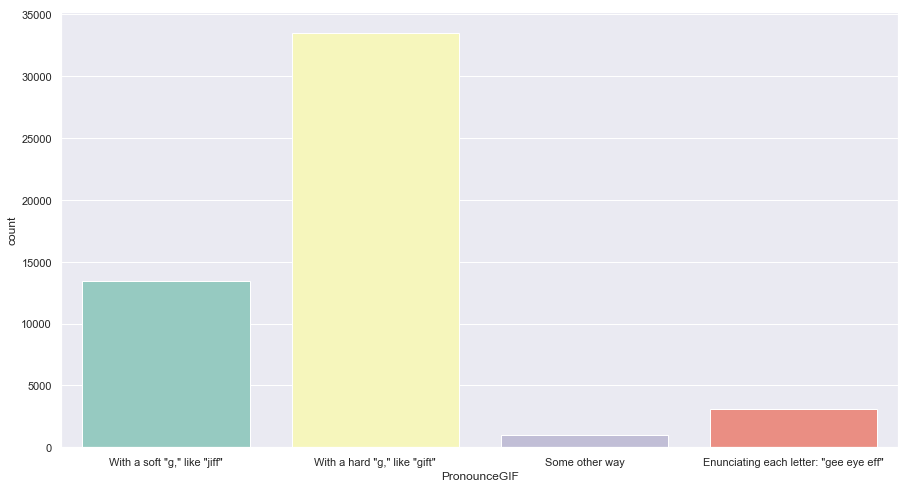

In [252]:
sns.countplot(x = 'PronounceGIF', data = df, palette='Set3' )

**Therefore there is no right or wrong way to pronounce it.**

## Hypothesis
Pronunciations are often defined by the geographic boundaries.

## Analysis
Country name can be used as a proxy for geographic boundaries.
And we will encode these variables to 0 and 1 so that it is easy for pandas to understand them.

In [253]:
df_gif = df[['PronounceGIF', 'Country']]

Take only the top 5 countries, and the top 2 ways to pronounce GIF

In [254]:
top_5_countries = ['United States', 'India', 'United Kingdom', 'Germany', 'Canada']
top_2_gif_pronunciations = ['With a hard "g," like "gift"','With a soft "g," like "jiff"']

In [255]:
df_gif = df_gif[df_gif.Country.isin(top_5_countries) & df_gif.PronounceGIF.isin(top_2_gif_pronunciations)]

**Use 0 for gift, and 1 for jiff**

In [256]:
df_gif.PronounceGIF = df_gif.PronounceGIF.replace({
    
   'With a hard "g," like "gift"' : 0,
    'With a soft "g," like "jiff"':1
})

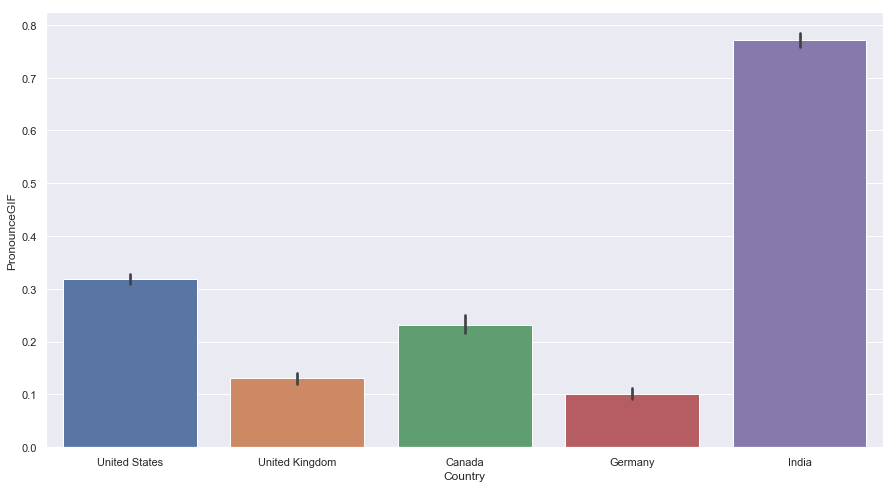

In [257]:
sns.barplot(x = "Country", y = "PronounceGIF", data = df_gif)

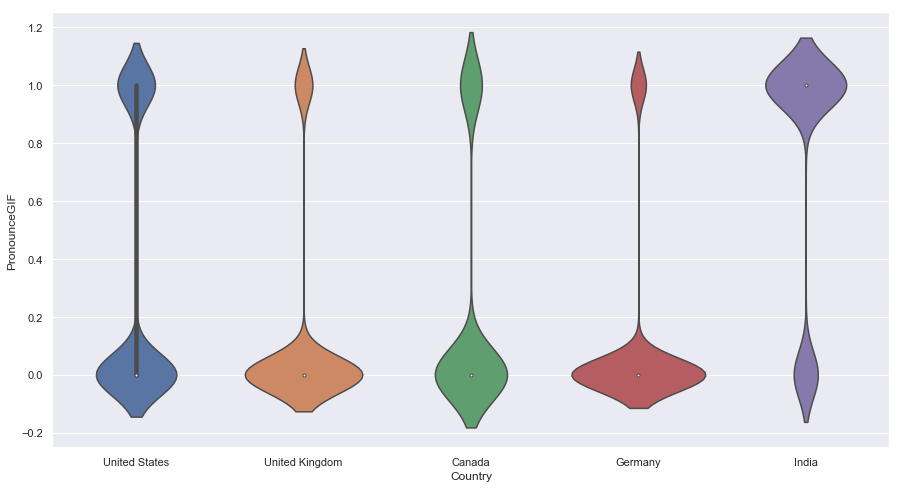

In [258]:
sns.violinplot(x = "Country", y = "PronounceGIF", data = df_gif)

## Conclusion

- There is no right or wrong way to pronounce the work 'GIF'. 
- Pronunciation is driven by geographic boundaries: Majority of participants from India pronounce gif 'With a soft "g," like "jiff", while it's the hard "g," like "gift" for other countries.

# Q2. Is there a salary bias on Gender?

In [259]:
df_sal = df.dropna(axis=0, subset = ['Salary'])
df_sal = df_sal[['Gender', 'Salary']]

In [260]:
df_sal['Gender'].value_counts()

Male                                                       10666
Female                                                       819
Other                                                         49
Male; Other                                                   44
Gender non-conforming                                         43
Male; Gender non-conforming                                   21
Female; Transgender                                           19
Female; Gender non-conforming                                 13
Transgender                                                    8
Male; Female; Transgender; Gender non-conforming; Other        6
Male; Female                                                   5
Transgender; Gender non-conforming                             4
Male; Transgender                                              4
Female; Transgender; Gender non-conforming                     3
Male; Gender non-conforming; Other                             1
Female; Transgender; Othe

Only select rows with gender values ['Male', 'Female']

In [261]:
df_sal = df_sal[df_sal['Gender'].isin(['Male', 'Female'])]

## Preliminary Analysis
Find the average salary and plot it.

In [262]:
df_sal_mean = df_sal.groupby(['Gender'], as_index = False)['Salary'].mean()

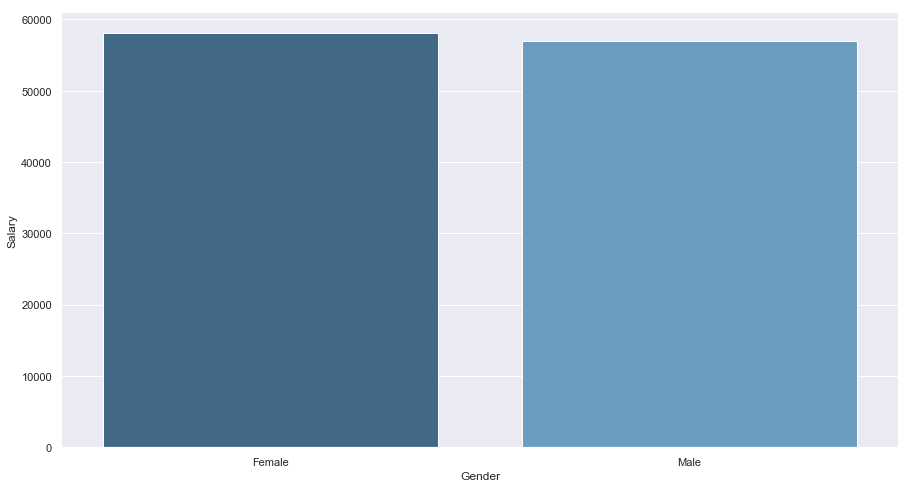

In [263]:
sns.barplot(x = 'Gender', y = 'Salary', data = df_sal_mean,order= ['Female', 'Male'],  palette='Blues_d')

**The average salary seems to be close for both genders.**

## Deeper Analysis#1: Distribution of data

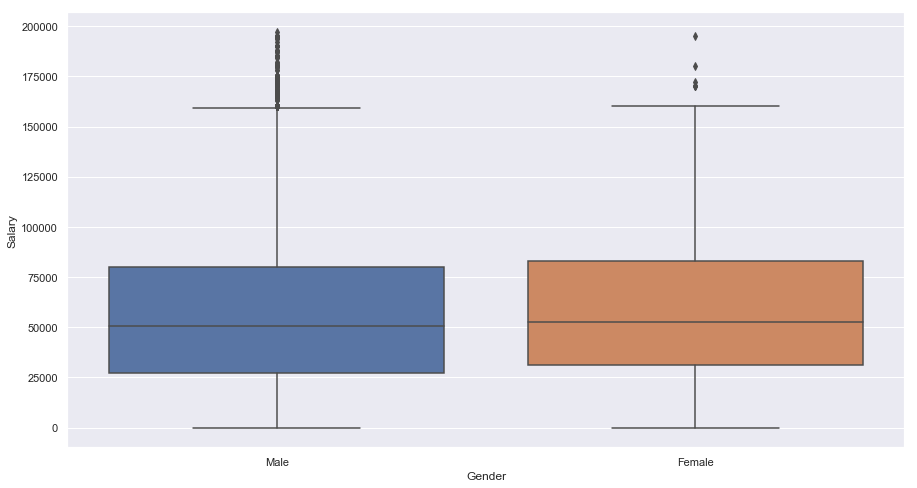

In [278]:
sns.boxplot(x = df_sal['Gender'], y = df_sal['Salary'])

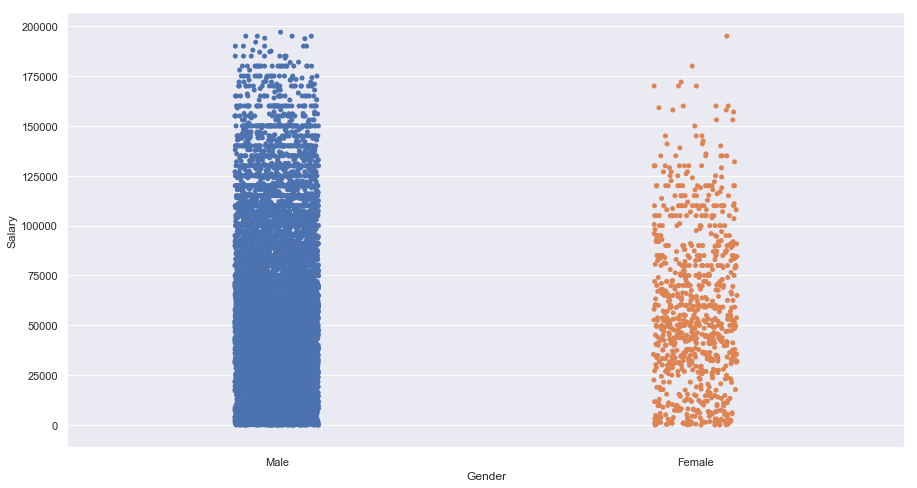

In [265]:
sns.stripplot(x = df_sal['Gender'], y = df_sal['Salary'])

Though the average salaries for men are lower, they seem to have a lot more salaries above $150K as compared to Women. !

## Deeper Analysis#2: Sample Size

Also, let's look at the distribution of data for averages using all datapoints. 

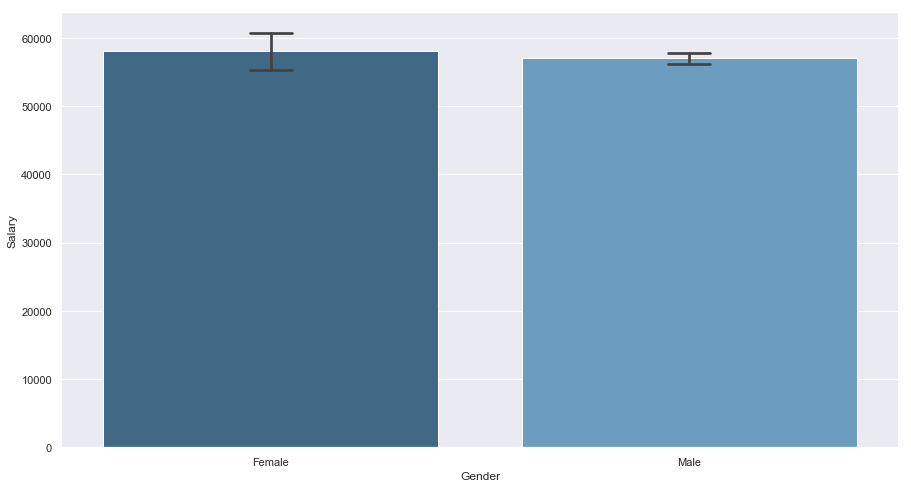

In [266]:
sns.barplot(x = df_sal['Gender'], y = df_sal['Salary'], capsize = .1,order= ['Female', 'Male'], palette="Blues_d")

There is a higher error for Females than Males. 
Is it because of the count of total datapoints?

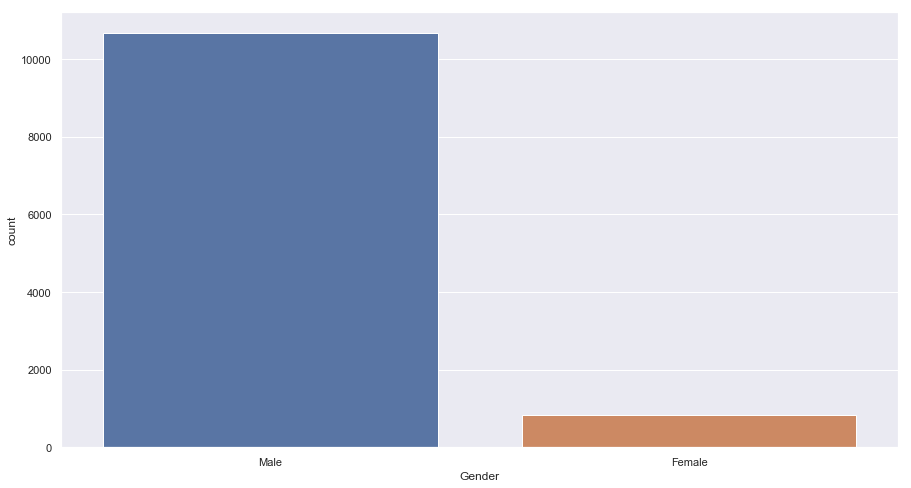

In [267]:
sns.countplot(x= 'Gender', data = df_sal)

**Clearly the Male participants were more than 12 times that of Female participants! Which also makes the analysis non conclusive.**

## Conclusion
Although the mean salaries for males and females were very close to each other.
- The distribution was not consistent: The top salaries (> $150k) are dominated by Men, even though the mean salary for men was slightly lower.
- The data isn't conclusive given there are12 times male participants as compared to female participants.

# Q3.What are the top methodologies for project management?

## Analysis

In [269]:
len(df.Methodology.value_counts())

788

In [279]:
df.Methodology.value_counts().nlargest()

Agile; Scrum                  2422
Agile                         1776
Agile; Scrum; Pair            1303
Agile; Scrum; Kanban          1223
Agile; Scrum; Pair; Kanban    1099
Name: Methodology, dtype: int64

There is a need to simplify the response. 
- Strip the responses to the individual methodologies. 
- Then take the count to find the most common methodologies. 

In [270]:
methodology_list = df['Methodology'].dropna().str.split(pat = ';').tolist()

In [271]:
methodology_dict = Counter()

In [272]:
for list1 in methodology_list:
    for obj in list1:
        obj = obj.strip()
        methodology_dict[obj] += 1

In [273]:
methodology_dict =  OrderedDict(methodology_dict.most_common())

In [274]:
len(methodology_dict.keys())

11

This seems to be a much more reasonable number for analysis. 

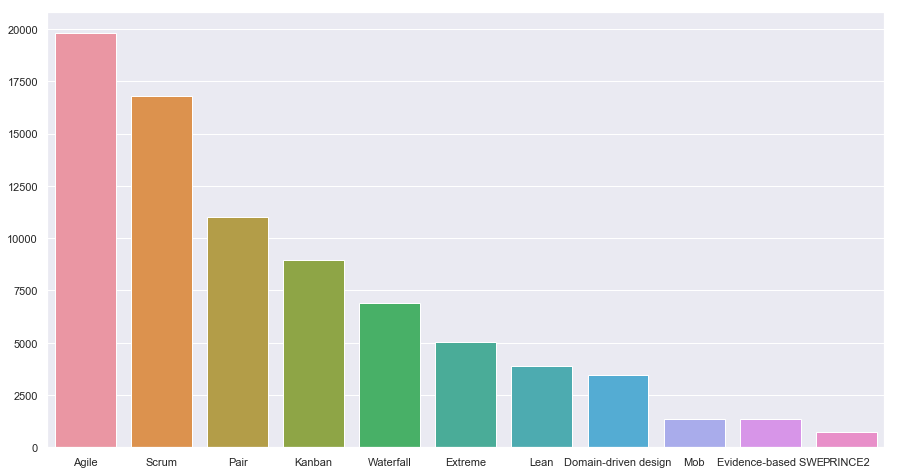

In [275]:
 sns.barplot(x = list(methodology_dict.keys()), y = list(methodology_dict.values()))

## Conclusion

Agile and scurm are the most common of the methodologies used for Data Science. 

# Summary
## GIF Pronunciation
- There is no correct way to pronounce GIF.
- Pronunciation varies by geographic boundaries!

## Gender Pay Gap
The data is not conclusive to refute or support that there is a gender pay gap. 
## Common Project Management Methodology
Agile and Scrum are the most common project management methodologies.